In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

df = pd.read_csv('training_cleaned.csv')


Confirm only string objects are in the data, by only selecting str types from intial dataset and create a copy of the dataframe

In [58]:
df_new = df.loc[df['Tweet'].apply(type) == str].copy()

print("Old Dataset with all types", df.count())
print("New Dataset with only str types",df_new.count())

Old Dataset with all types Tweet        31770
Sentiment    31938
dtype: int64
New Dataset with only str types Tweet        31770
Sentiment    31770
dtype: int64


Remove single characters words (Ex. 'A', 'I')

In [2]:
df_new['Tweet_Clean'] = df_new['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)> 1]))

df_new.head()

,Tweet,Sentiment,Tweet_Clean
0,relaxin nite drinkin earl grey watchin cool sh...,4,relaxin nite drinkin earl grey watchin cool sh...
1,cool would nice,4,cool would nice
2,hate lynz sorry say,0,hate lynz sorry say
3,awake bored annoyed,0,awake bored annoyed
4,song day lacey awesome,4,song day lacey awesome


# Word Clouds

We want to get an understanding of what are the most common words in all the tweets

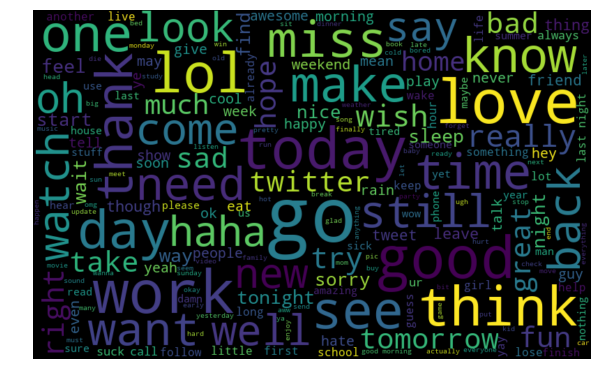

In [3]:
all_words = ' '.join([text for text in df_new['Tweet_Clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see there is a lot of words that you would associate postive sentiment that occure the most (ie. love, good, well, will..)

It is harder to see any negative words, we will know look postive labeled tweets and negative labeled tweets seperate

## Negative Sentiment Words

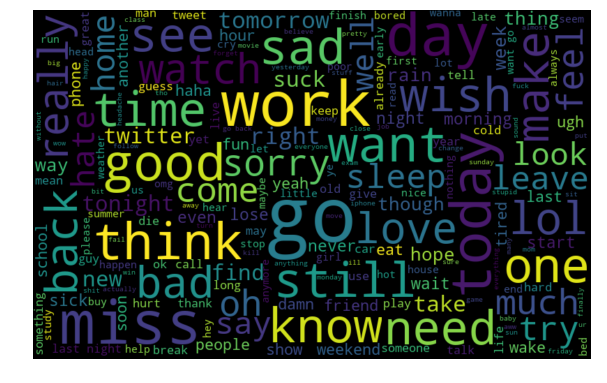

In [4]:
normal_words =' '.join([text for text in df_new['Tweet_Clean'][df_new['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see the most common occuring words in the negative sentiment are ; Sad, Miss, Sleep, Still, Work, Suck...


## Postive Sentiment Words

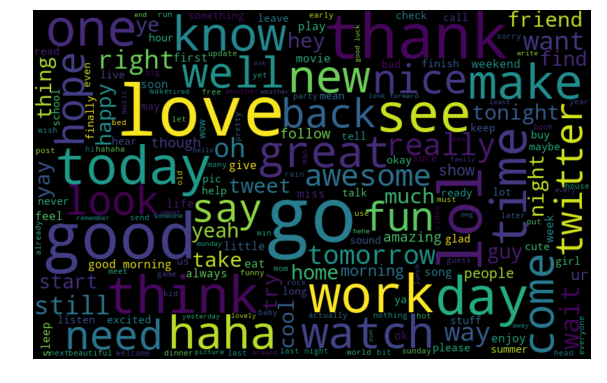

In [5]:
normal_words =' '.join([text for text in df_new['Tweet_Clean'][df_new['Sentiment'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We see the postive word cloud is very similar to the overall word clound, with most common words being love, go, good, nice ...

Create Feature Column showing the number of "!" occurances

In [7]:
#df['Countof!'] = df['Tweet_Clean'].str.count(r'([!]+)')

Create Feature Column showing the number of at least ".."  occurances

In [8]:
#df['Countof.'] = df['Tweet_Clean'].str.count(r'([..]+)')

# Feature Engineering

## Bag of Words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000, stop_words='english')
cv_matrix = cv.fit_transform(df_new['Tweet_Clean'])
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Check to See Number of Words

In [20]:
len(cv_matrix[0])

1000

In [21]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
BOW = pd.DataFrame(cv_matrix, columns=vocab)

In [22]:
BOW_dataset = pd.concat([df_new['Sentiment'], BOW], axis=1, join='inner')

In [23]:
BOW_dataset.head()

,Sentiment,able,absolutely,account,ache,act,actually,add,afford,afternoon,...,yep,yes,yesterday,yo,young,youtube,yr,yum,yummy,yup
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bag of N-Grams Model

### 2 Grams Model

In [24]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2),max_df=0.90, max_features=1000, stop_words='english')
bv_matrix = bv.fit_transform(df_new['Tweet_Clean'])

bv_matrix = bv_matrix.toarray()
vocab_2gram = bv.get_feature_names()
TwoGram = pd.DataFrame(bv_matrix, columns=vocab_2gram)

TwoGram_dataset = pd.concat([df_new['Sentiment'], TwoGram], axis=1, join='inner')
TwoGram_dataset.head()

,Sentiment,able sleep,act like,add train,air france,album come,amazing love,angel demon,answer phone,aw man,...,yeah know,yeah right,yeah yeah,year ago,year old,yes good,yes thank,yes think,yes yes,yr old
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  TF-IDF Model


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_df=0.90, max_features=1000, stop_words='english', use_idf=True)
tv_matrix = tv.fit_transform(df_new['Tweet_Clean'])
tv_matrix = tv_matrix.toarray()

vocab_tf = tv.get_feature_names()
tf_idf = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab_tf)
tf_idf_dataset = pd.concat([df_new['Sentiment'], tf_idf], axis=1, join='inner')
tf_idf_dataset.head()

,Sentiment,able,absolutely,account,ache,act,actually,add,afford,afternoon,...,yep,yes,yesterday,yo,young,youtube,yr,yum,yummy,yup
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


['able',
 'absolutely',
 'account',
 'ache',
 'act',
 'actually',
 'add',
 'afford',
 'afternoon',
 'age',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahh',
 'ahhh',
 'ahhhh',
 'air',
 'airport',
 'album',
 'alive',
 'allow',
 'alot',
 'alright',
 'amazing',
 'angel',
 'annoying',
 'answer',
 'anymore',
 'apart',
 'apartment',
 'app',
 'apparently',
 'appear',
 'apple',
 'appreciate',
 'area',
 'argh',
 'arm',
 'arrive',
 'art',
 'article',
 'ask',
 'asleep',
 'ass',
 'atm',
 'august',
 'australia',
 'aw',
 'awake',
 'award',
 'away',
 'awesome',
 'awful',
 'aww',
 'awww',
 'awwww',
 'babe',
 'baby',
 'background',
 'bad',
 'bag',
 'ball',
 'band',
 'bank',
 'bar',
 'battery',
 'bb',
 'bbq',
 'bc',
 'bday',
 'beach',
 'bear',
 'beat',
 'beautiful',
 'bed',
 'beer',
 'begin',
 'believe',
 'bet',
 'better',
 'bf',
 'big',
 'bike',
 'bird',
 'birthday',
 'bit',
 'bitch',
 'bite',
 'black',
 'blackberry',
 'blah',
 'blast',
 'bless',
 'block',
 'blog',
 'blood',
 'bloody',
 'blow',
 'blue',
 'boa

# Feature Selection

Now that we have some features engineered we want to select which features are most important to identifying the sentiment

## Feature Importance

We will create multiple random decision trees to help us find our most important features

In [52]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
# load data
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = read_csv(url, names=names)
#array = dataframe.values
dataframe = tf_idf_dataset
array = dataframe.values
X = array[:,1:len(array)-1]
Y = array[:,0]

dataframe.head()

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

# Select the important features of Model
sel = SelectFromModel(model, prefit=True)

# Subset features
X_new = sel.transform(X)





c:\users\tblakeley\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


275

In [56]:
print("Old Number of Features: " ,len(X[0]))
print("New Number of Features: " ,len(X_new[0]))


Old Number of Features:  1000
New Number of Features:  275
